# Bag-of-Words (BoW) Exploration Summary: Natural Language Processing with Disaster Tweets

## Introduction

This notebook conducts a comprehensive exploration of the dataset provided for the "Natural Language Processing with Disaster Tweets" Kaggle competition, with a specific focus on utilizing the Bag-of-Words (BoW) technique. The primary objective is to develop a predictive model capable of discerning whether a tweet refers to a real disaster or not. Building upon the earlier exploration of dataset structure and analysis of the target variable, this summary extends to include the BoW representation of text data and modeling using SVC, Logistic Regression, and Random Forest algorithms.

## Goals of BoW Exploration

1. **Exploration of Text Data using Bag-of-Words (BoW)**:
   - Application of the Bag-of-Words (BoW) technique to represent text data as numerical features.
   - Analysis of vocabulary size and feature matrix representation to understand the transformation of text data into BoW format.
   - Identification of common words and phrases in both disaster and non-disaster tweets based on their frequency in the BoW representation.

2. **Modeling with BoW Representation**:
   - Implementation of Support Vector Classifier (SVC), Logistic Regression, and Random Forest algorithms using BoW features.
   - Hyperparameter tuning and model optimization to achieve the best performance.
   - Evaluation of model performance metrics such as F1 score, recall, precision, and accuracy.

In [12]:
from Modules_Functions import *
df      = pd.read_csv("..\\Data\\final_df.csv", encoding="latin-1")
df_test = pd.read_csv("..\\Data\\test.csv",  encoding="latin-1")

df.head()

target  text_len                                      combined_text
0       1        13   deed reason earthquake may allah forgive unknown
1       1         7      forest fire near la ronge sask canada unknown
2       1        22  resident ask shelter place notify officer evac...
3       1         9  people receive wildfire evacuation order calif...
4       1        17  get send photo ruby alaska smoke wildfire pour...

####  Defining Features and Target Variables and Splitting Data

In [13]:
features = df['combined_text']
target   = df['target']

#--------------------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(features, 
                                                    target, 
                                                    test_size    = 0.1, 
                                                    random_state = 42)
print(f'length of X_train: {len(X_train)}')
print(f'length of X_test : {len(X_test)}')

length of X_train: 6849
length of X_test : 762


In [14]:
X_train.head()

4619    mcfadden reportedly test hamstring thursday vi...
2858          nema warn nigerians prepare drought drought
3098    cook early get electrocute crucial psychic lol...
3751                                            fire fire
5284    family affect fatal outbreak legionnaires dise...
Name: combined_text, dtype: object

####  Creating Bag-of-Words Features from Training Data

In [15]:
count_vectorizer = CountVectorizer()
features_bow     = count_vectorizer.fit_transform(X_train)
test_bow         = count_vectorizer.transform(X_test)
features_names   = count_vectorizer.get_feature_names_out()
len(features_names)

12825

#### Displaying the First 10 Rows of Bag-of-Words Features

In [16]:
pd.set_option('display.max_columns', None)
# -----------------------------------------------------------
pd.DataFrame(features_bow.toarray(), columns = features_names).head(10)

aa  aaaa  aaaaaaallll  aaarrrgghhh  aan  aannnnd  aar  aaronthefm  \
0   0     0            0            0    0        0    0           0   
1   0     0            0            0    0        0    0           0   
2   0     0            0            0    0        0    0           0   
3   0     0            0            0    0        0    0           0   
4   0     0            0            0    0        0    0           0   
5   0     0            0            0    0        0    0           0   
6   0     0            0            0    0        0    0           0   
7   0     0            0            0    0        0    0           0   
8   0     0            0            0    0        0    0           0   
9   0     0            0            0    0        0    0           0   

   aashiqui  ab  aba  abandon  abandoned  abandonedpic  abbandoned  abbott  \
0         0   0    0        0          0             0           0       0   
1         0   0    0        0          0             0           0       0   
2         0   0    0        0          0             0           0       0   
3         0   0    0        0          0             0           0       0   
4         0   0    0        0          0             0           0       0   
5         0   0    0        0          0             0           0       0   
6         0   0    0        0          0             0           0       0   
7         0   0    0        0          0             0           0       0   
8         0   0    0        0          0             0           0       0   
9         0   0    0        0          0             0           0       0   

   abbruchsimulator  abbswinston  abbyairshow  abc  abcnew  abcnews  abcnorio  \
0                 0            0            0    0       0        0         0   
1                 0            0            0    0       0        0         0   
2                 0            0            0    0       0        0         0   
3                 0            0            0    0       0        0         0   
4                 0            0            0    0       0        0         0   
5                 0            0            0    0       0        0         0   
6                 0            0            0    0       0        0         0   
7                 0            0            0    0       0        0         0   
8                 0            0            0    0       0        0         0   
9                 0            0            0    0       0        0         0   

   abe  aberdeen  aberdeenfanpage  aberdeenfc  abha  abia  ability  abject  \
0    0         0                0           0     0     0        0       0   
1    0         0                0           0     0     0        0       0   
2    0         0                0           0     0     0        0       0   
3    0         0                0           0     0     0        0       0   
4    0         0                0           0     0     0        0       0   
5    0         0                0           0     0     0        0       0   
6    0         0                0           0     0     0        0       0   
7    0         0                0           0     0     0        0       0   
8    0         0                0           0     0     0        0       0   
9    0         0                0           0     0     0        0       0   

   ablaze  able  ableg  abninfvet  aboard  abomb  abomination  abortion  abq  \
0       0     0      0          0       0      0            0         0    0   
1       0     0      0          0       0      0            0         0    0   
2       0     0      0          0       0      0            0         0    0   
3       0     0      0          0       0      0            0         0    0   
4       0     0      0          0       0      0            0         0    0   
5       0     0      0          0       0      0            0         0    0   
6       0     0      0          0       

#### Hyperparameter Tuning and Model Training with Support Vector Classifier (SVC)

In [17]:
import warnings
from   sklearn.exceptions import ConvergenceWarning
# Suppress specific warning messages
warnings.filterwarnings("ignore", message="Solver terminated early*", category=Warning)

# --------------------------------------------------------------------------------------------------
model_kernel        = SVC(random_state = 42, 
                          max_iter     = 10000)

search_space_kernel = {'C'           : [0.08, 0.09, 0.1],                
                       'kernel'      : ['linear','poly', 'rbf'],    
                       'class_weight': [None, 'balanced']
                       }

model_bow           = GridSearchCV(estimator  = model_kernel, 
                                   param_grid = search_space_kernel, 
                                   cv         = 5, 
                                   n_jobs     = -1, 
                                   scoring    = "f1")

model_bow.fit(features_bow,y_train)
# ----------------------------------------------------------------------------------------------------
test_bow             = count_vectorizer.transform(X_test)
y_pred_bow           = model_bow.predict(test_bow)

print('Best score:       ', model_bow.best_score_) 
print('Best C:           ', model_bow.best_estimator_.C) 
print('Best kernel:      ', model_bow.best_estimator_.kernel)
print('Best class_weight:', model_bow.best_estimator_.class_weight) 

Best score:        0.7607395057861627
Best C:            0.1
Best kernel:       linear
Best class_weight: balanced


#### Evaluating Model Performance with Confusion Matrix and Metrics

Model  F1 Score    Recall  Precision  Accuracy
0  SVC BOW  0.760125  0.724036        0.8    0.7979

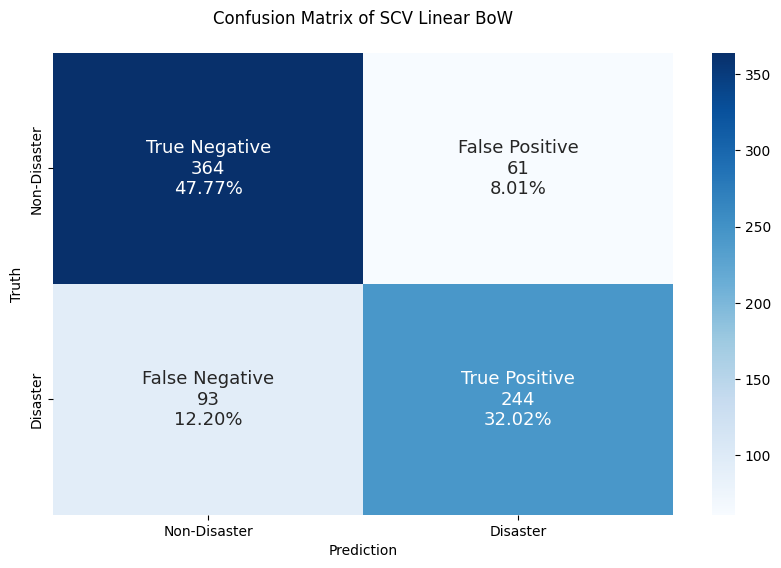

In [18]:
Confusion_Matrix_Func(y_test, y_pred_bow,'SCV Linear BoW');
#--------------------------------------------
#print(classification_report(y_test, y_pred_bow))
f1_bow          = f1_score(y_test       , y_pred_bow)
recall_bow      = recall_score(y_test   , y_pred_bow)
precision_bow   = precision_score(y_test, y_pred_bow)
accuracy_bow    = accuracy_score(y_test , y_pred_bow)

bow_metrics     = pd.DataFrame({
                                'Model'    : ['SVC BOW'],
                                'F1 Score' : [f1_bow],
                                'Recall'   : [recall_bow],
                                'Precision': [precision_bow],
                                'Accuracy' : [accuracy_bow]
                            })
bow_metrics

----------------------------


-----------------------------

#### Logistic Regression with BoW

In [19]:
pipeline_lr   = Pipeline([
                        ('logisticRegr', LogisticRegression(max_iter=10000, random_state=42))
                        ])

search_space  = {
                'logisticRegr__C'           : [0.5, 0.55, 0.58],
                'logisticRegr__penalty'     : ['l2'],#,'l1'],
                'logisticRegr__solver'      : ['saga','liblinear','lbfgs'],
                'logisticRegr__class_weight': [None, 'balanced']
                 }

model_lr_bow = GridSearchCV(estimator  = pipeline_lr, 
                            param_grid = search_space, 
                            cv         = 5, 
                            n_jobs     = -1, 
                            scoring    = "f1")

model_lr_bow.fit(features_bow, y_train)

test_lr_bow   = count_vectorizer.transform(X_test)
pred_lr_bow   = model_lr_bow.predict(test_lr_bow)

# Print best score and parameters
print('Best score:       ', model_lr_bow.best_score_) 
print('Best C:           ', model_lr_bow.best_estimator_.named_steps['logisticRegr'].C) 
print('Best penalty:     ', model_lr_bow.best_estimator_.named_steps['logisticRegr'].penalty)
print('Best solver:      ', model_lr_bow.best_estimator_.named_steps['logisticRegr'].solver)
print('Best class weight:', model_lr_bow.best_estimator_.named_steps['logisticRegr'].class_weight)

Best score:        0.759459396949823
Best C:            0.55
Best penalty:      l2
Best solver:       lbfgs
Best class weight: balanced


Model  F1 Score    Recall  Precision  Accuracy
0  LR BOW  0.771822  0.747774   0.797468  0.804462

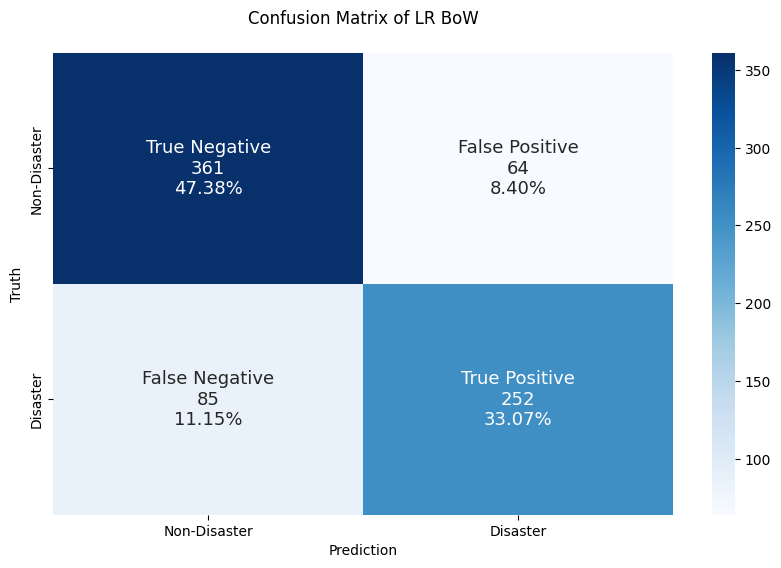

In [20]:

f1_lr_bow        = f1_score(y_test       ,pred_lr_bow)
recall_lr_bow    = recall_score(y_test   ,pred_lr_bow)
precision_lr_bow = precision_score(y_test,pred_lr_bow)
accuracy_lr_bow  = accuracy_score(y_test ,pred_lr_bow)
Confusion_Matrix_Func(y_test, pred_lr_bow,'LR BoW')

bow_lr_metrics   = pd.DataFrame({
                                'Model'    : ['LR BOW'],
                                'F1 Score' : [f1_lr_bow],
                                'Recall'   : [recall_lr_bow],
                                'Precision': [precision_lr_bow],
                                'Accuracy' : [accuracy_lr_bow]
                            })
bow_lr_metrics

#### Visualizing F1 Score vs. Threshold for Logistic Regression (Bag-of-Words)

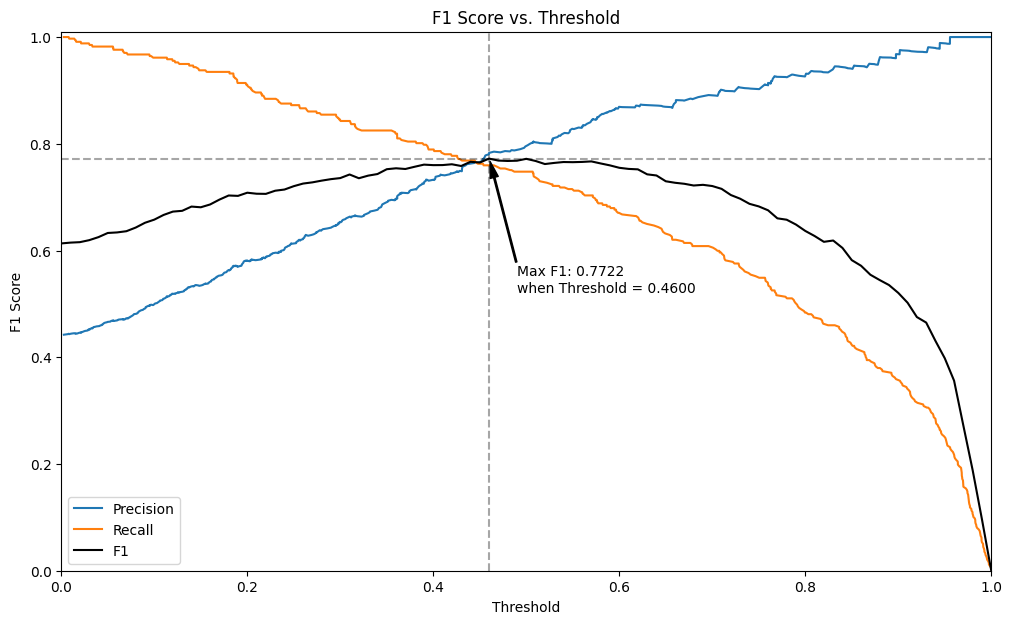

In [21]:
# Find the f1 score for each threshold 
from sklearn.metrics import f1_score

fig, ax = plt.subplots(figsize= (12,7))


p_curve, r_curve, t_curve =  precision_recall_curve(y_test, model_lr_bow.predict_proba(test_lr_bow)[:,1])
plt.plot(t_curve, p_curve[:-1], label = 'Precision')
plt.plot(t_curve, r_curve[:-1], label = 'Recall')
# -------------------------------------------------------------------------------------------------

f1 = []
threshold = np.linspace(0,1,101)
for level in threshold:
    y_pred  = model_lr_bow.predict_proba(test_lr_bow)[:,1] > level
    f1.append(f1_score(y_test, y_pred))
# --------------------------------------------------------------
    
max_f1_index     = np.argmax(f1)
max_f1_threshold = threshold[max_f1_index]
max_f1_value     = f1[max_f1_index]
#---------------------------------------------------------------

sns.lineplot(x   = threshold, y =f1, label = 'F1', color = 'black')
# plt.scatter([max_f1_threshold], [f1[max_f1_index]], marker='o', s = 175, color='blue', alpha=0.2, label='Max F1')
plt.axvline(x = max_f1_threshold, linestyle='--', color = 'black', alpha = 0.35)
plt.axhline(y = f1[max_f1_index], linestyle='--', color='black'  , alpha=0.35)


plt.annotate(f'Max F1: {max_f1_value:.4f} \nwhen Threshold = {max_f1_threshold:.4f}', 
             xy         = (max_f1_threshold + 0.001, max_f1_value - 0.005),
             xytext     = (max_f1_threshold + 0.03, max_f1_value - 0.25),
             arrowprops = dict(facecolor='black', width= 1, headwidth= 6),
             )


plt.xlabel('Threshold')
plt.ylabel('F1 Score')
plt.title('F1 Score vs. Threshold')
ax.set_xlim(left   = 0, right = 1)
ax.set_ylim(bottom = 0, top = 1.01);

----------------------------------

----------------------

#### Evaluating Model Performance with Confusion Matrix and Metrics for Random Forest Classifier with BoW Features

In [22]:
pipeline_rf    = Pipeline([
                           ('rf', RandomForestClassifier(random_state=42))
                          ])

search_space   = {
                  'rf__n_estimators'     : [265, 270, 280],     # Example values for n_estimators
                # 'rf__max_depth'        : [None, 1],           # Example values for max_depth
                  'rf__min_samples_split': [7, 8, 9],           # Example values for min_samples_split
                  'rf__min_samples_leaf' : [2, 3, 4],           # Example values for min_samples_leaf
                  'rf__class_weight'     : ['balanced']
                  }

grid_search_rf = GridSearchCV(estimator  = pipeline_rf,
                              param_grid = search_space,
                              cv         = 3,
                              n_jobs     = -1,
                              scoring    = "f1") 

grid_search_rf.fit(features_bow, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('rf',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'rf__class_weight': ['balanced'],
                         'rf__min_samples_leaf': [2, 3, 4],
                         'rf__min_samples_split': [7, 8, 9],
                         'rf__n_estimators': [265, 270, 280]},
             scoring='f1')

#### Evaluating Model Performance with Confusion Matrix and Metrics for Random Forest Classifier with BoW Features

Best score:               0.7485059153107666
Best n_estimators:        Pipeline(steps=[('rf',
                 RandomForestClassifier(class_weight='balanced',
                                        min_samples_leaf=2, min_samples_split=7,
                                        n_estimators=265, random_state=42))])


Model  F1 Score    Recall  Precision  Accuracy
0  RF BoW  0.750769  0.724036   0.779553  0.787402

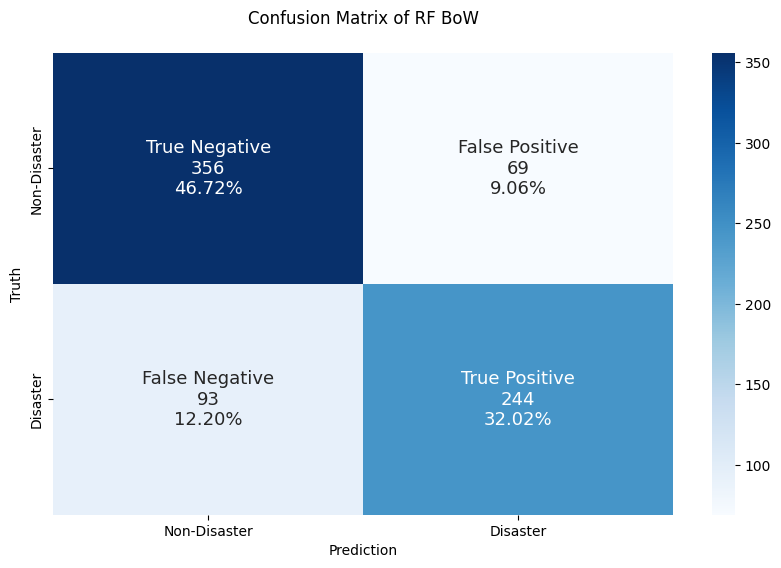

In [23]:
test_bow = count_vectorizer.transform(X_test)
y_pred_rf  = grid_search_rf.predict(test_bow)
# Print best score and parameters
print('Best score:              ', grid_search_rf.best_score_) 
print('Best n_estimators:       ', grid_search_rf.best_estimator_)

Confusion_Matrix_Func(y_test, y_pred_rf,'RF BoW');
#print(classification_report(y_test, y_pred_rf))
f1_rf_bow        = f1_score(y_test       ,y_pred_rf)
recall_rf_bow    = recall_score(y_test   ,y_pred_rf)
precision_rf_bow = precision_score(y_test,y_pred_rf)
accuracy_rf_bow  = accuracy_score(y_test ,y_pred_rf)

bow_rf_metrics   = pd.DataFrame({
                                  'Model'    : ['RF BoW'],
                                  'F1 Score' : [f1_rf_bow],
                                  'Recall'   : [recall_rf_bow],
                                  'Precision': [precision_rf_bow],
                                  'Accuracy' : [accuracy_rf_bow]
                                  })
bow_rf_metrics

--------------------------

---------------------------